# Import Libraries

In [240]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


from sklearn import preprocessing, tree


import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix



from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer


from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeClassifier, plot_tree


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report



# Loading dataset

In [241]:

df = pd.read_csv('houses.csv')
df.head(1)

,Unnamed: 0,id,region_no,price,building_cond,living_area,property_type,rooms_number,zip_code,land_area,...,swimming_pool,furnished,open_fire,terrace,terrace_area,facades_number,building_state,province,region,building_condition
0,0,10147032,6,159000,2,122,house,2,4430,335,...,0,0,0,1,20,2,0,Liège,Wallonia,Good


# Creating few features based on categorical features :

1) Selecting the room column and i am narrowing my result based on room numbers

2) Selecting the region to narrow down my results. This will give me the focused result based upon the region.

3) For focused result i have narrow down the parameters of selecting the houses based upon price.

These three parameters how help us selecting our best model. Lets see....

In [242]:
#removing the columns not required for further processing
rem_col = ['Unnamed: 0', 'id','province','region','building_condition', 'zip_code' ]
df.drop(rem_col, axis=1, inplace=True)



In [243]:
#Narrowing the bedrooms
df = df[df["rooms_number"] <= 10]

In [244]:
# As i have divided the region and given 1 to 11 values. Now i am narrowing my dataset to region_no: 1
df = df[df["region_no"] == 1]

In [245]:
df.region_no.value_counts()

1    551
Name: region_no, dtype: int64

In [246]:
#Narrowing down the houses as per price.
        #remove price > 500_000
df = df[df['price'] < 14000000]
        #remove price < 50_000
df = df[df['price'] >   100000]

In [247]:
#df['living_area'] = df['living_area'].fillna(df.groupby(['property_type','rooms_number'])['living_area'].transform('mean'))

In [248]:
houses = df

In [249]:
#now we have all numeric values. Lets check the corrilation between variables
houses.corr()

C:\Users\sheet\AppData\Local\Temp\ipykernel_132204\673662426.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  houses.corr()


,region_no,price,building_cond,living_area,rooms_number,land_area,garden,garden_area,equipped_kitchen,swimming_pool,furnished,open_fire,terrace,terrace_area,facades_number,building_state
region_no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,1.000000,0.064323,0.835876,0.417900,0.689152,-0.142532,0.311300,-0.008624,0.485527,-0.023766,0.236725,-0.123161,0.169741,0.400796,0.271049
building_cond,NaN,0.064323,1.000000,0.034424,-0.014985,-0.018749,-0.053628,-0.044609,0.093647,-0.011838,0.030969,-0.048771,0.064817,0.044921,0.035448,-0.006554
living_area,NaN,0.835876,0.034424,1.000000,0.566805,0.620619,-0.096526,0.265106,0.041568,0.484099,-0.012685,0.180011,-0.087125,0.137881,0.278802,0.162459
rooms_number,NaN,0.417900,-0.014985,0.566805,1.000000,0.306626,0.006751,0.190523,0.105937,0.264564,0.035536,0.029611,0.001961,0.102974,0.175782,-0.036573
land_area,NaN,0.689152,-0.018749,0.620619,0.306626,1.000000,-0.140062,0.240006,0.021899,0.431433,-0.039582,0.093914,-0.153301,0.082217,0.347447,0.112371
garden,NaN,-0.142532,-0.053628,-0.096526,0.006751,-0.140062,1.000000,0.352481,0.065261,-0.016489,-0.024028,-0.042093,0.299424,0.144046,-0.092005,0.031010
garden_area,NaN,0.311300,-0.044609,0.265106,0.190523,0.240006,0.352481,1.000000,0.009871,0.313507,-0.022719,0.056784,0.121242,0.241021,0.338908,0.128712
equipped_kitchen,NaN,-0.008624,0.093647,0.041568,0.105937,0.021899,0.065261,0.009871,1.000000,0.070167,0.058104,-0.077644,0.117290,0.024213,0.044259,-0.123560
swimming_pool,NaN,0.485527,-0.011838,0.484099,0.264564,0.431433,-0.016489,0.313507,0.070167,1.000000,-0.026462,0.070971,-0.009173,0.177474,0.214061,0.162326


C:\Users\sheet\AppData\Local\Temp\ipykernel_132204\2654907085.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = houses.corr()


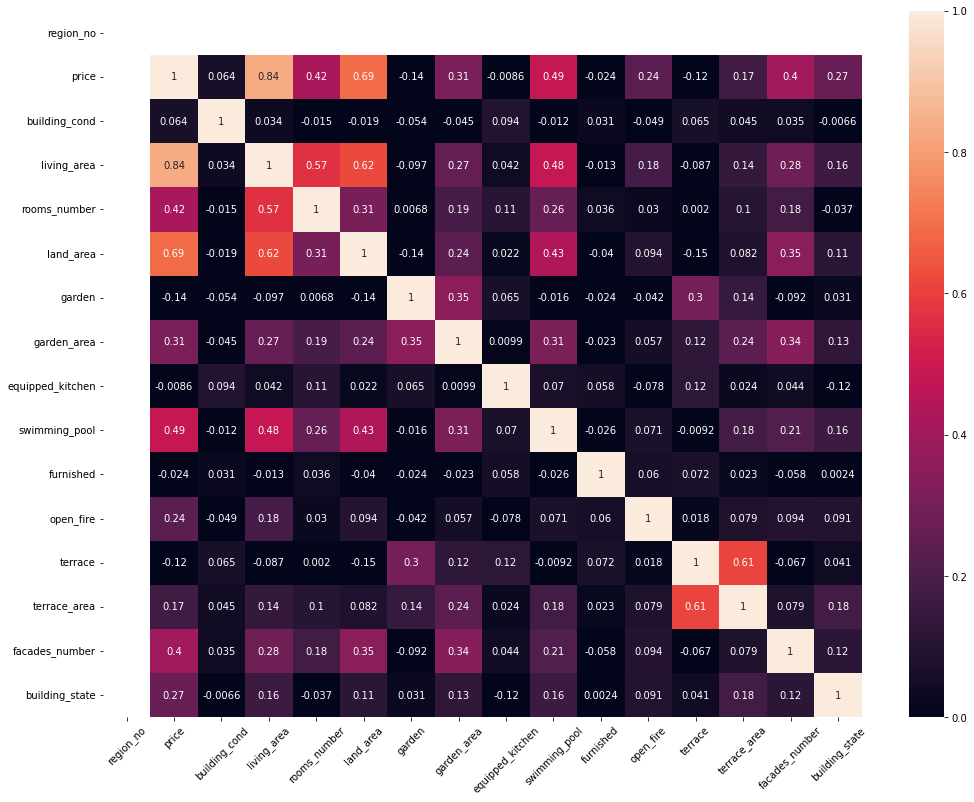

In [250]:
#the correlation matrix to check corrilation between the variables:
corr_matrix = houses.corr()
fig = plt.figure(figsize=(17, 13))
sns.heatmap(corr_matrix, vmin=0, vmax=1,annot=True)

plt.xticks(rotation=45)
plt.savefig('heatmap1.png')
plt.show()

# Model Selection & Testing

1) Data Splitting and Scaling

a) Data Splitting

In [251]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

y= df['price']
X= df[['living_area','rooms_number','facades_number','building_state', 'land_area','swimming_pool','building_state','open_fire','building_cond','garden_area']]
#splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)
print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

The dimension of X_train is (385, 10)
The dimension of X_test is (166, 10)


b) Scaling

In [252]:
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

2) Model Testing

# LinearRegression Model

In [253]:
#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
r_sq = lr.score(X, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {lr.intercept_}")
#print(f"slope: {lr.coef_}")

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)


print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

coefficient of determination: -264557.66376694094
intercept: 1092801.6883116884
The train score for lr model is 0.7952389293191514
The test score for lr model is 0.7401342105901847


c:\Users\sheet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


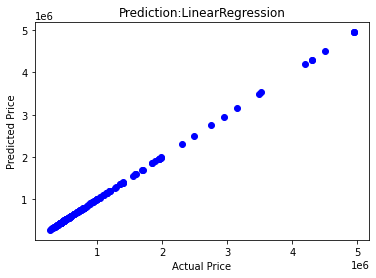

In [254]:
plt.scatter(y_test, actual, c='blue')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Prediction:LinearRegression')
plt.savefig('LinearRegression.png')
plt.show()

# Ridge Regression Model

In [255]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
#Ridge Regression Model
ridge = Ridge(alpha=10)

ridge.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridge.score(X_train, y_train)
test_score_ridge = ridge.score(X_test, y_test)
pred = y_test

print("\nRidge Model:\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


Ridge Model:

The train score for ridge model is 0.7948960136596451
The test score for ridge model is 0.7439518538341862


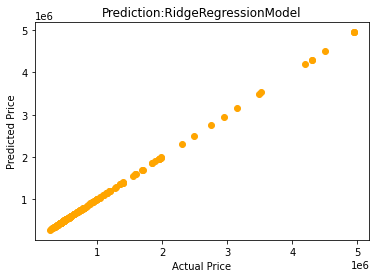

In [256]:
plt.scatter(y_test, pred, c='orange')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Prediction:RidgeRegressionModel')
plt.savefig('RidgeRegressionModel.png')
plt.show()

In [257]:
#Ridge regression model without Alpha
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)

print("Training set score: {:.3f}".format(ridge.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(ridge.score(X_test, y_test)))

Training set score: 0.795
Test set score: 0.741


# Lasso Model

In [258]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import model_selection

#Lasso regression model
print("\nLasso Model....................Alpha:10........................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)
pred_lasso = y_test

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))



Lasso Model....................Alpha:10........................

The train score for ls model is 0.7952389281206451
The test score for ls model is 0.7401446209307285


In [259]:
print("\nLasso Model....................Alpha:p.1........................\n")
Lasso = Lasso(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.3f}".format(Lasso.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(Lasso.score(X_test, y_test)))


Lasso Model....................Alpha:p.1........................

Training set score: 0.795
Test set score: 0.740


In [260]:
# Lasso model with max iter = 10000
from sklearn.linear_model import Lasso
lasso = Lasso(max_iter=10000)
lasso.fit(X_train, y_train)
print("Training set score: {:.3f}".format(lasso.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(lasso.score(X_test, y_test))) 
#print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.795
Test set score: 0.740


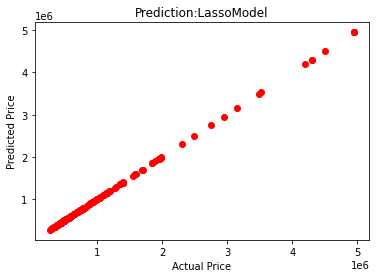

In [261]:
plt.scatter(y_test, pred_lasso, c='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Prediction:LassoModel')
plt.savefig('LassoModel.png')
plt.show()

# RandomForestClassifier

In [270]:
# Train the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

rf_model = RandomForestRegressor(n_estimators=40,random_state=42)
rf_model.fit(X_train,y_train)
rf_model_pred =rf_model.predict(X_test)

# Score
rf_score=rf_model.score(X_test,y_test)
print('Accuracy score:', rf_score)
actual_RandomForestRegressor = X_test
pred_RandomForestRegressor = y_test

mae = mean_absolute_error(y_test, rf_model_pred )

from sklearn.metrics import r2_score
r2 = r2_score(y_test, rf_model_pred)

Accuracy score: 0.8069088942112361


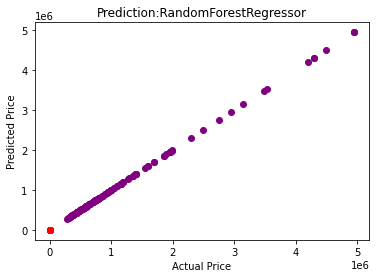

In [271]:
plt.scatter(X_test, actual_RandomForestRegressor, c='red')
plt.scatter(y_test, pred_RandomForestRegressor, c='purple')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices Vs Predicted Prices')
plt.title('Prediction:RandomForestRegressor')
plt.savefig('RandomForestRegressor.png')
plt.show()

# GradientBoostingRegressor

In [266]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor
rf_regressor = GradientBoostingRegressor(n_estimators=40,random_state=42) #28 et 42
rf_regressor.fit(X_train,y_train)
rf_pred =rf_regressor.predict(X_test)

rf_pred =rf_regressor.predict(X_test)

actual_GradientBoostingRegressor = X_test
pred_GradientBoostingRegressor = y_test


# Score
rf_score=rf_regressor.score(X_test,y_test)
print('Score:', rf_score)


Score: 0.8109834939382735


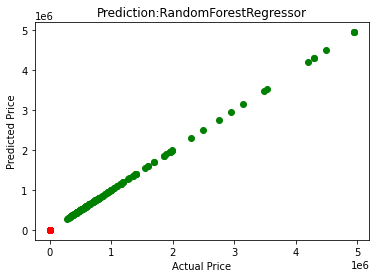

In [268]:
plt.scatter(X_test, actual_GradientBoostingRegressor, c='red')
plt.scatter(y_test, pred_GradientBoostingRegressor, c='green')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Prediction:RandomForestRegressor')
plt.savefig('RandomForestRegressor.png')
plt.show()